In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

In [3]:
def plot_count(x,hue,title):
    plt.figure(figsize=(18,4))
    sns.countplot(x=df[x], hue=df[hue], palette=color)
    plt.title(f'{title} {x} by {hue}', fontsize=16, fontweight='bold')
    plt.tick_params(axis='x', labelrotation=90, labelsize=12)
    plt.xlabel(x, fontsize=14)
    return plt.show()



def plot_bar(x,y,title):
    plt.figure(figsize=(18,4))
    sns.barplot(x=df[x], y=df[y], palette=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()


def plot_scatter(x,y,title):
    plt.figure(figsize=(18,4))
    sns.scatterplot(x=df[x], y=df[y], palette=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()



color = ['#ADD8E6', '#FFA500','#00008B','#00FFFF','#A52A2A','#87AFC7','#DAEE01','#FBE7A1','#BFB8AD','#FFDB58']

In [4]:
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
np.seterr(divide='ignore', invalid='ignore', over='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
%matplotlib inline  
sns.set(rc={'figure.figsize': [7, 14]}, font_scale=1.2) # Standard figure size for all 

In [6]:
carData = pd.read_csv("/kaggle/input/carprediction/car data.csv")
df = pd.DataFrame(carData)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.shape

(301, 9)

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df2 = pd.DataFrame (df, columns= ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'])
df2.describe()

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [11]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('*'*75)

Car_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'He

In [13]:
df.duplicated().sum()

2

In [14]:
df.loc[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [15]:
df1 = df.drop_duplicates(keep='first')
df1.shape

(299, 9)

In [16]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
df1["Present_Price"].describe().round(2)

count    299.00
mean       7.54
std        8.57
min        0.32
25%        1.20
50%        6.10
75%        9.84
max       92.60
Name: Present_Price, dtype: float64

In [18]:
df1["Age"] = 2020
df1["Age"] = df1["Age"]-df1["Year"]
df1

/tmp/ipykernel_20/766915590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"] = 2020
/tmp/ipykernel_20/766915590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"] = df1["Age"]-df1["Year"]


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [19]:
# Calculate the "Age" of cars from the "Year" feature
latest_year = df1.Year.max() + 1
latest_year

2019

In [20]:
T = {'Manual':1,'Automatic':0}
df1.Transmission = [T[item] for item in df1.Transmission]
S = {'Dealer':1 , 'Individual':0}
df1.Seller_Type = [S[item] for item in df1.Selling_type]
F = {'Petrol':1, 'Diesel':2, 'CNG':3}
df1.Fuel_Type = [F[item] for item in df1.Fuel_Type]
df1.head()

/tmp/ipykernel_20/321163739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Transmission = [T[item] for item in df1.Transmission]
/tmp/ipykernel_20/321163739.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.Seller_Type = [S[item] for item in df1.Selling_type]
/tmp/ipykernel_20/321163739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Fuel_Type = [F[item] for item in d

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,1,Dealer,1,0,6
1,sx4,2013,4.75,9.54,43000,2,Dealer,1,0,7
2,ciaz,2017,7.25,9.85,6900,1,Dealer,1,0,3
3,wagon r,2011,2.85,4.15,5200,1,Dealer,1,0,9
4,swift,2014,4.60,6.87,42450,2,Dealer,1,0,6


/tmp/ipykernel_20/3741072667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df1.corr(), cmap = "YlOrBr", dendrogram_ratio = (0.1, 0.2),annot = True, linewidths = .8, figsize = (9,10))


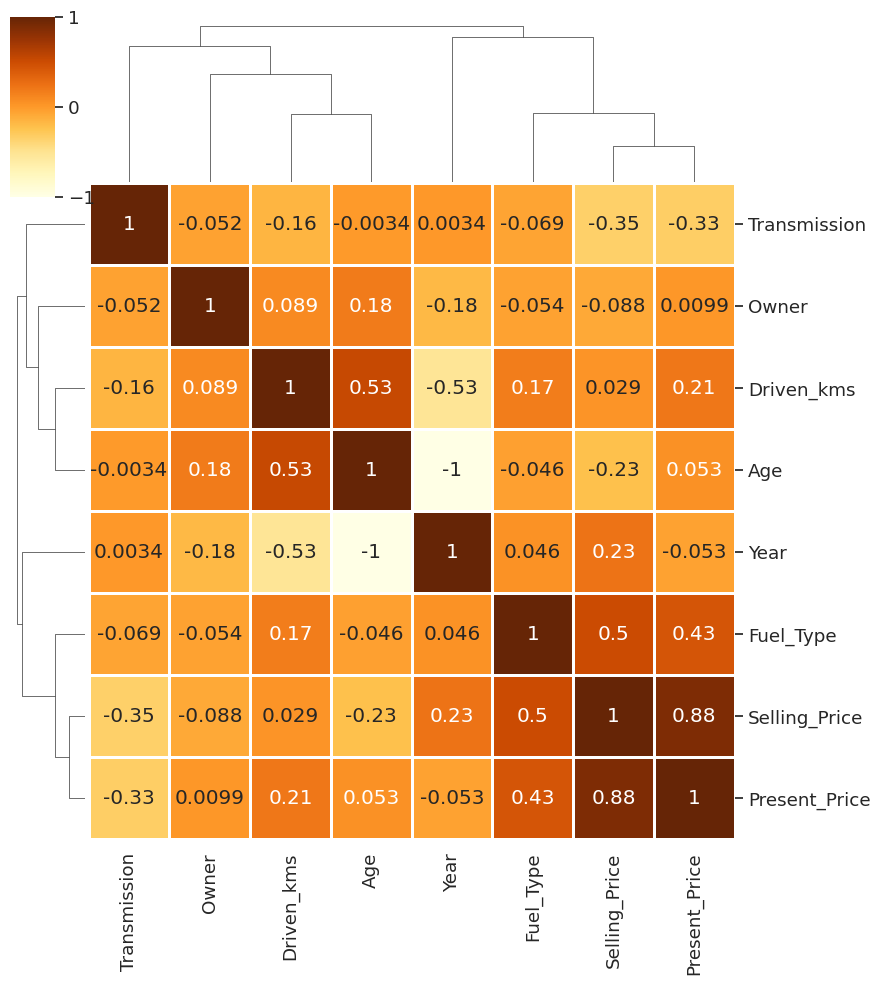

In [21]:
sns.clustermap(df1.corr(), cmap = "YlOrBr", dendrogram_ratio = (0.1, 0.2),annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [22]:
df1.Selling_Price.describe()

count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [23]:
Selling_Price_mean_median = df1.Selling_Price.mean() - df1.Selling_Price.median()
print (Selling_Price_mean_median*1000,"$")

1079.6321070234117 $


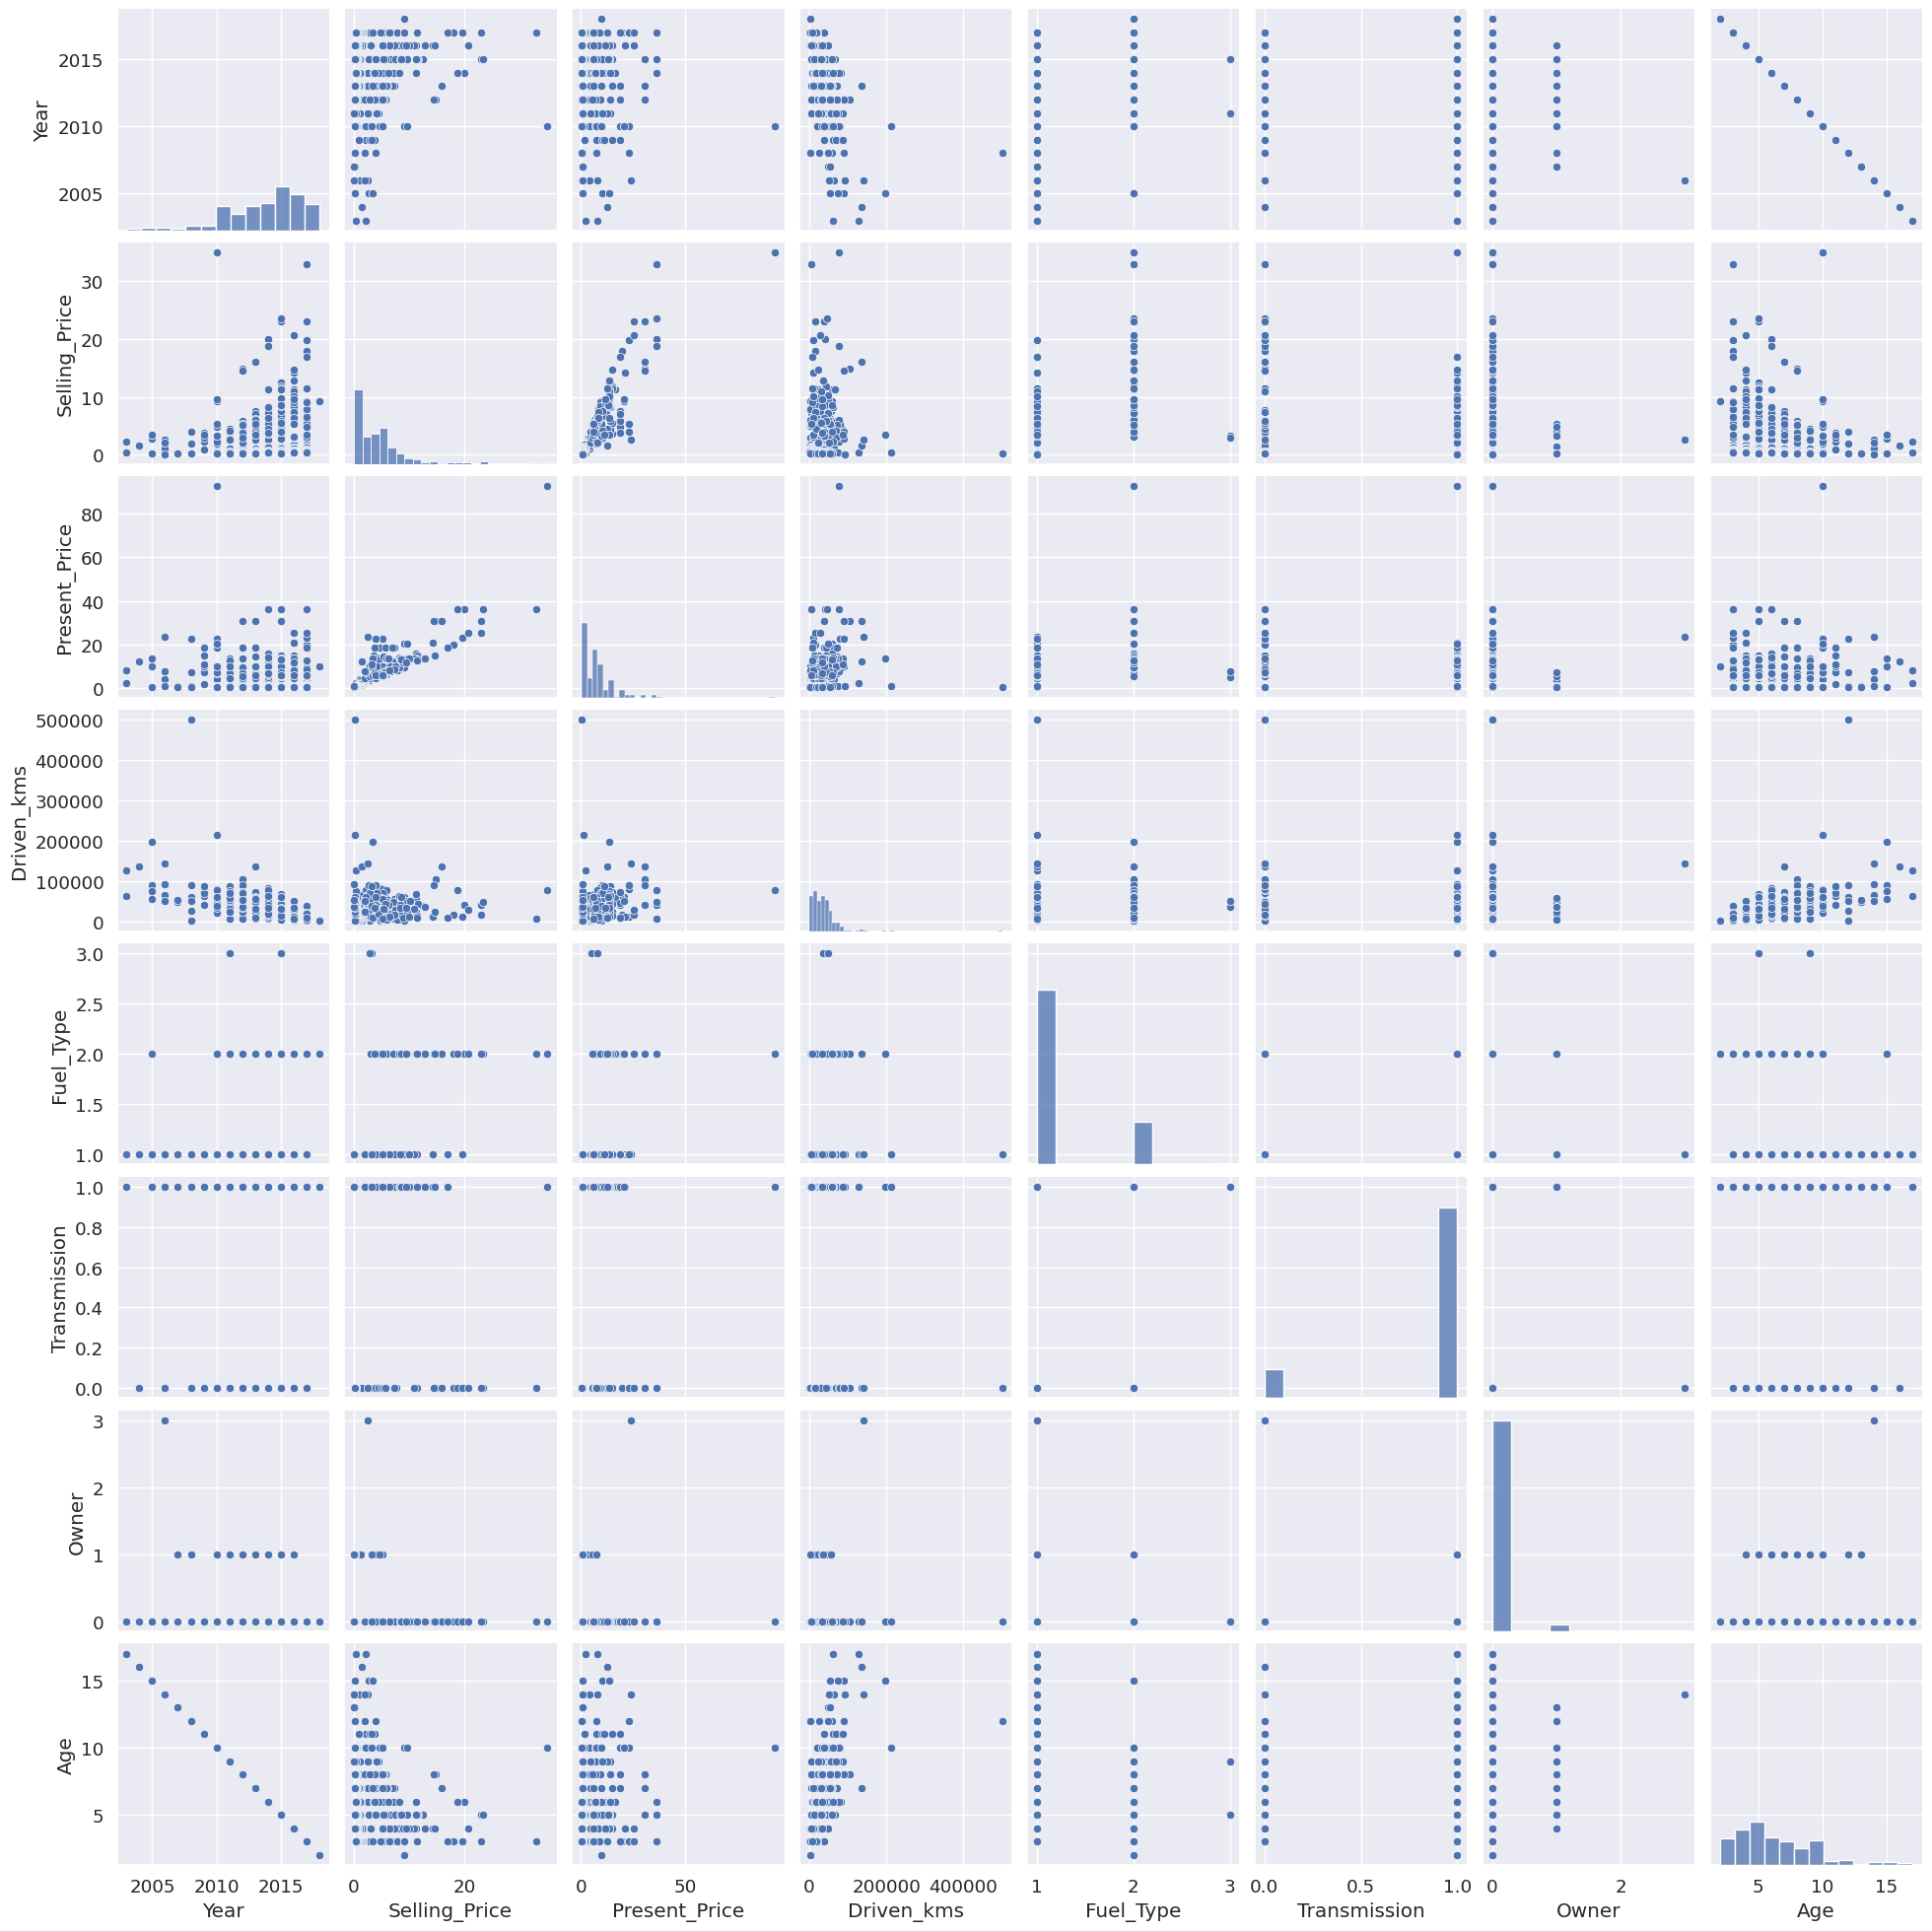

In [24]:
sns.pairplot(df1)
plt.show()

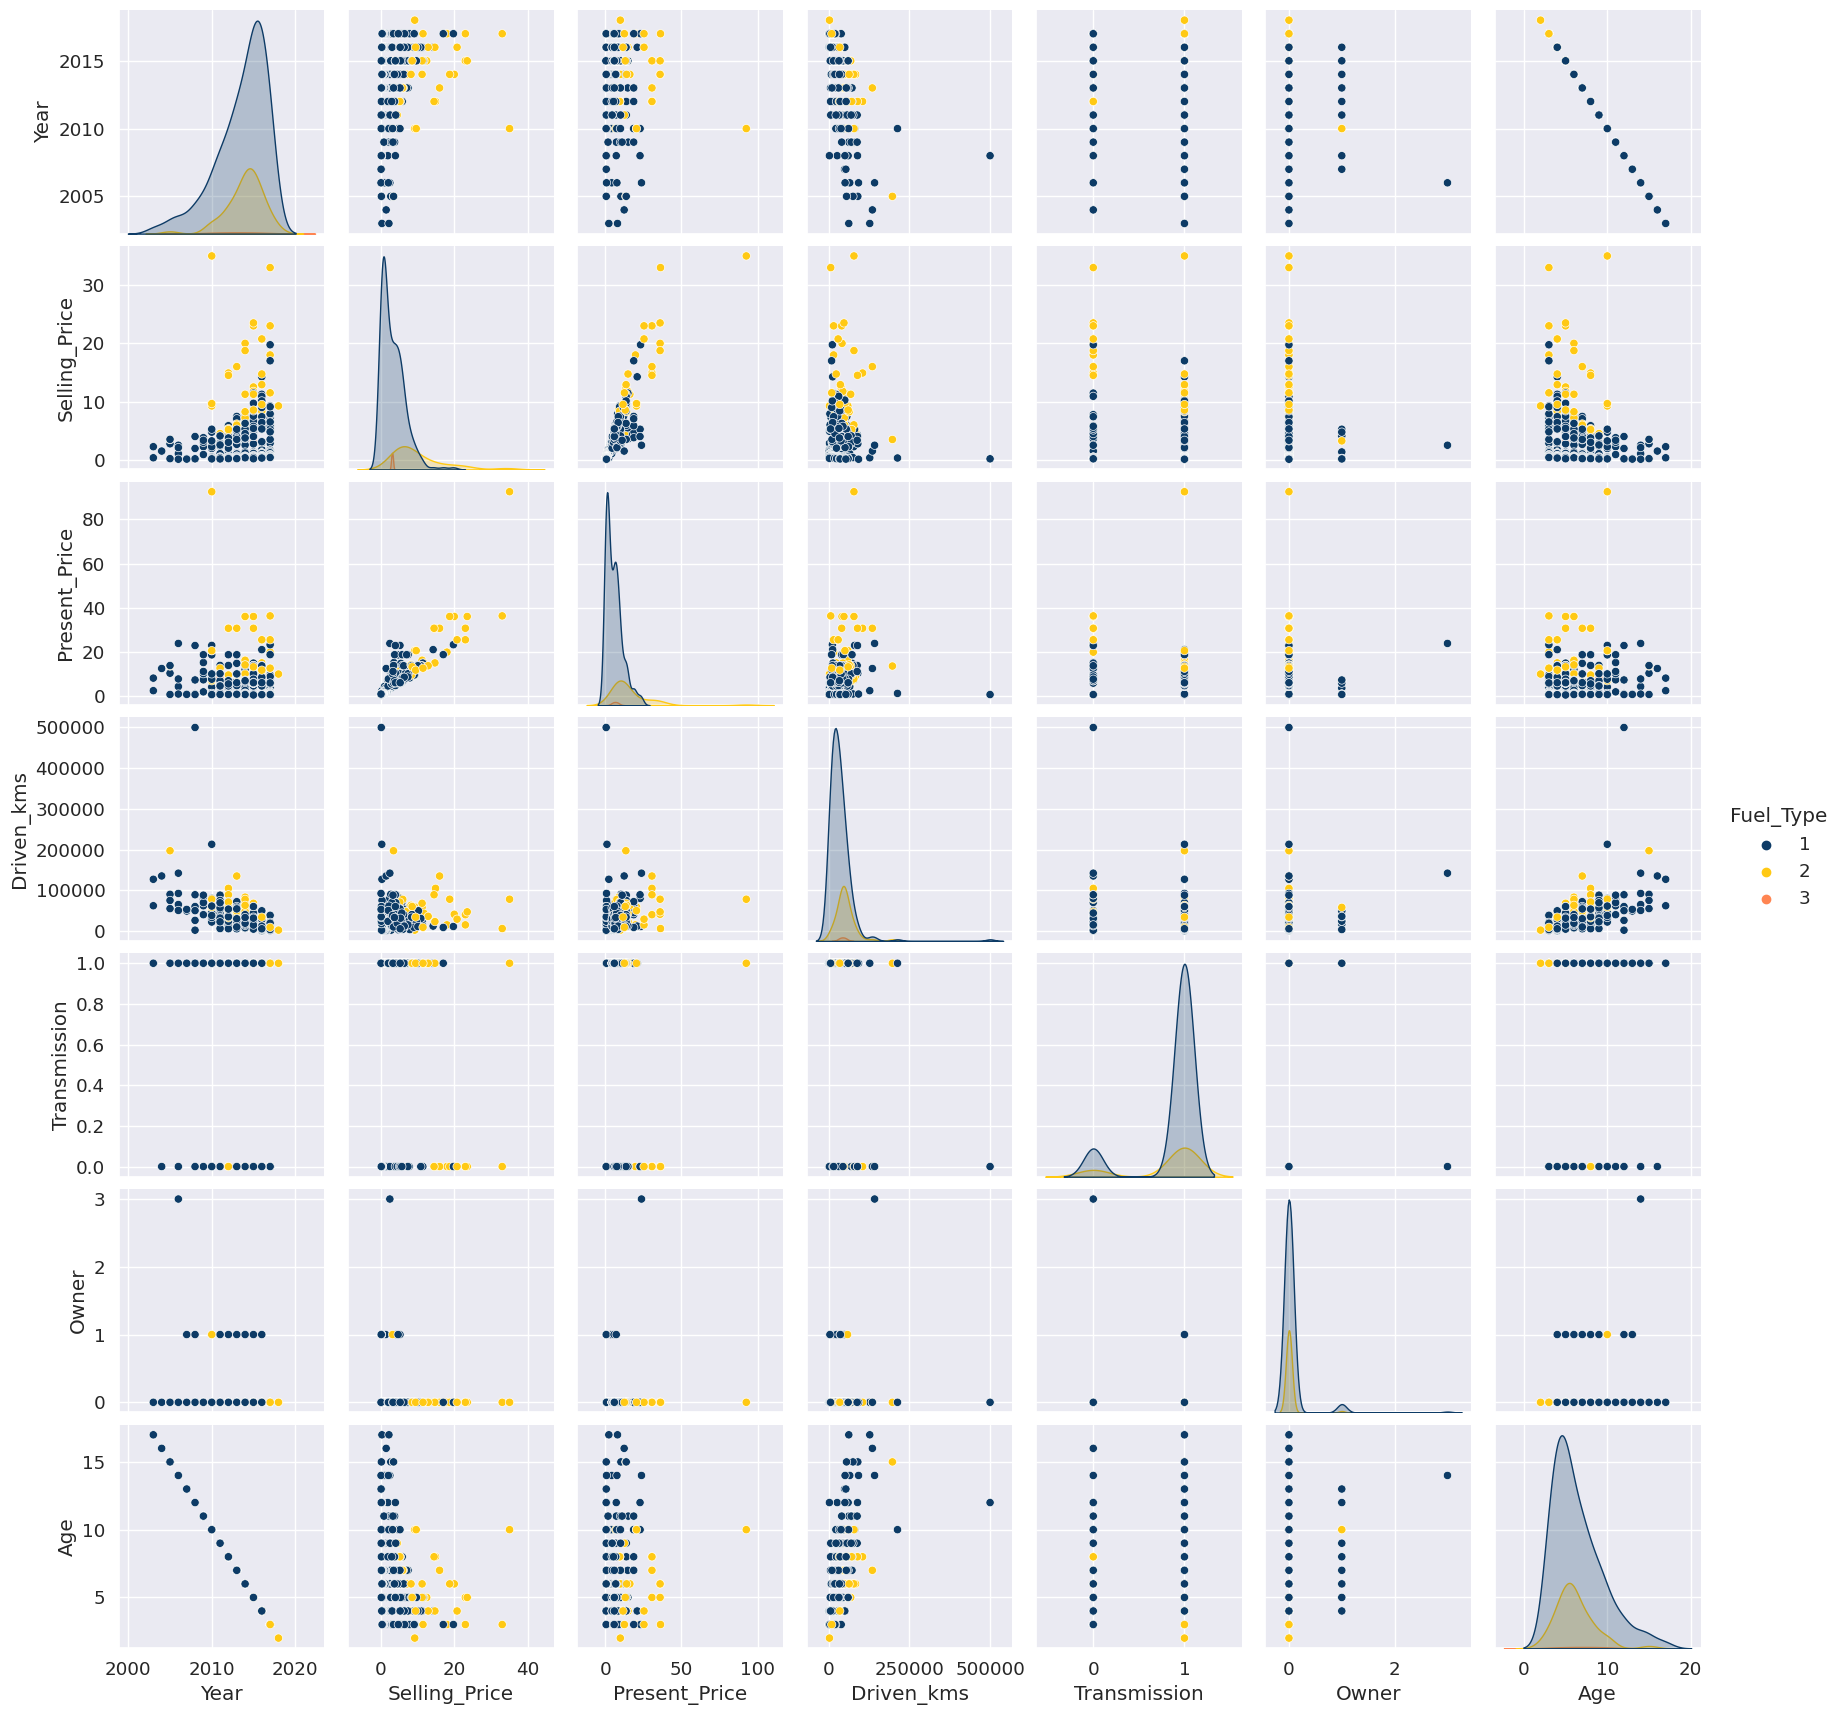

In [25]:
sns.pairplot(df1, hue='Fuel_Type',palette=['#0D3B66', '#FFC914','#FF8552'])
plt.show()

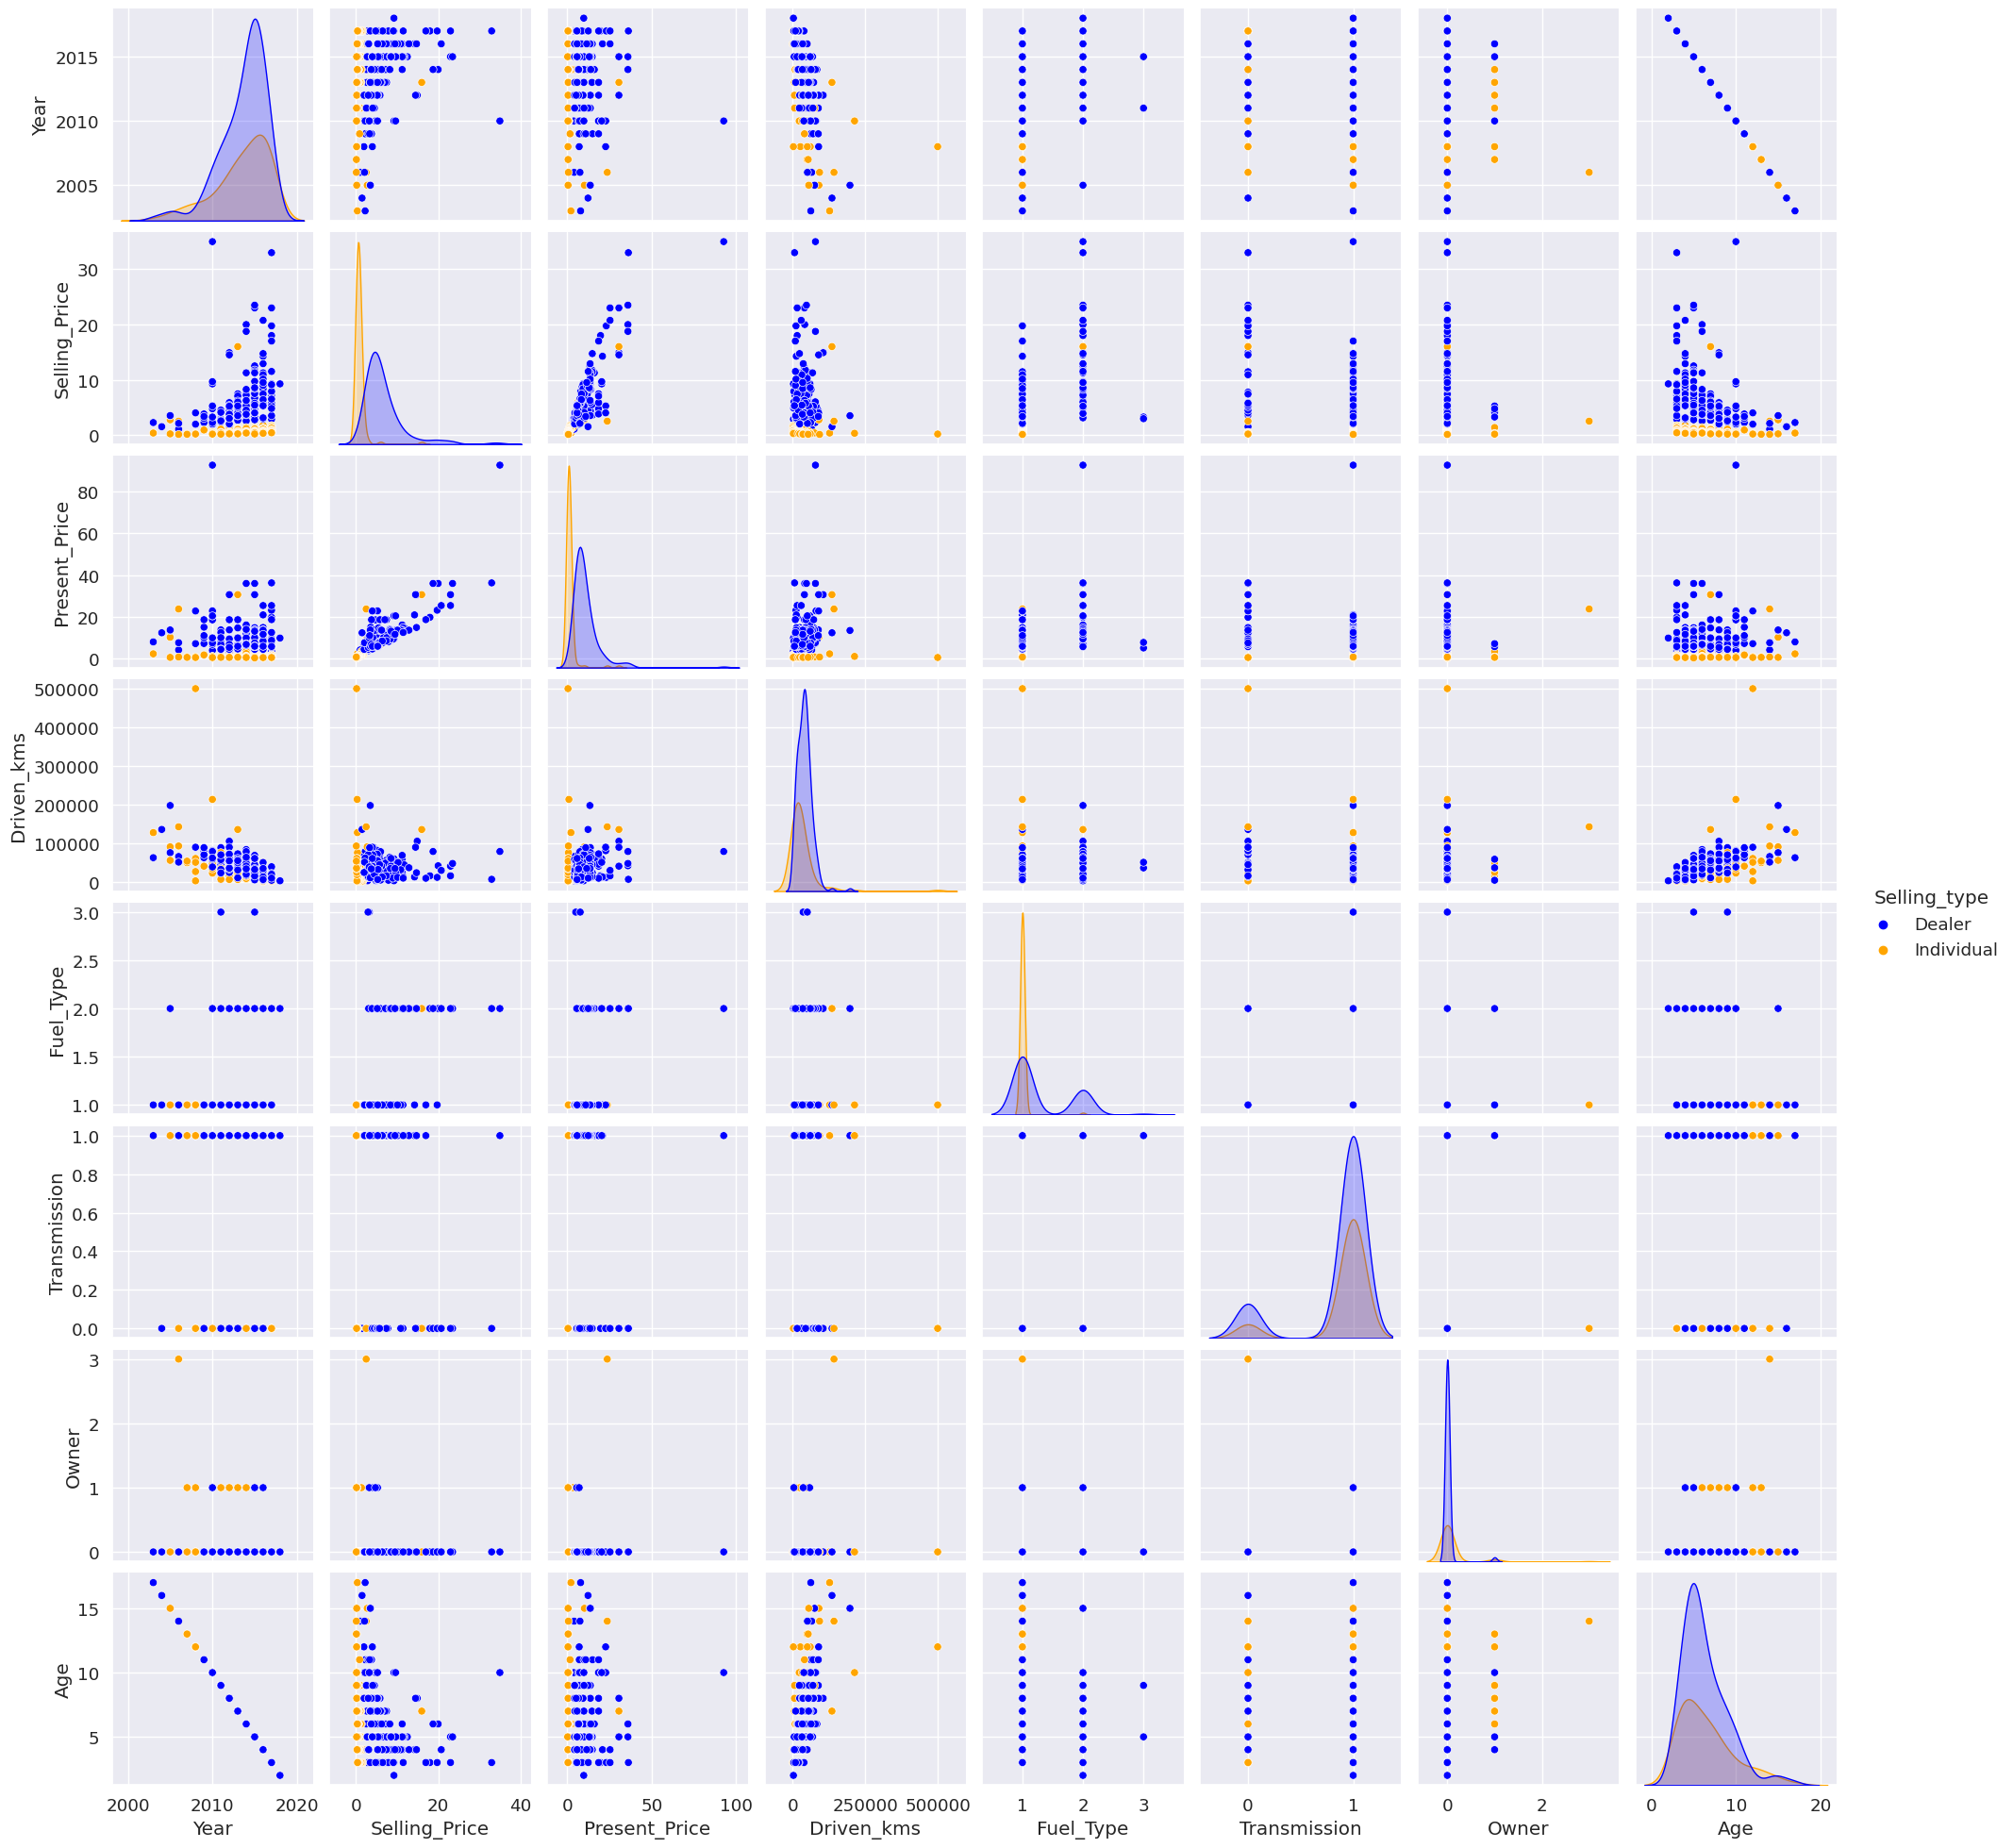

In [26]:
sns.pairplot(df1, hue='Selling_type',palette=['blue', 'orange'])
plt.show()

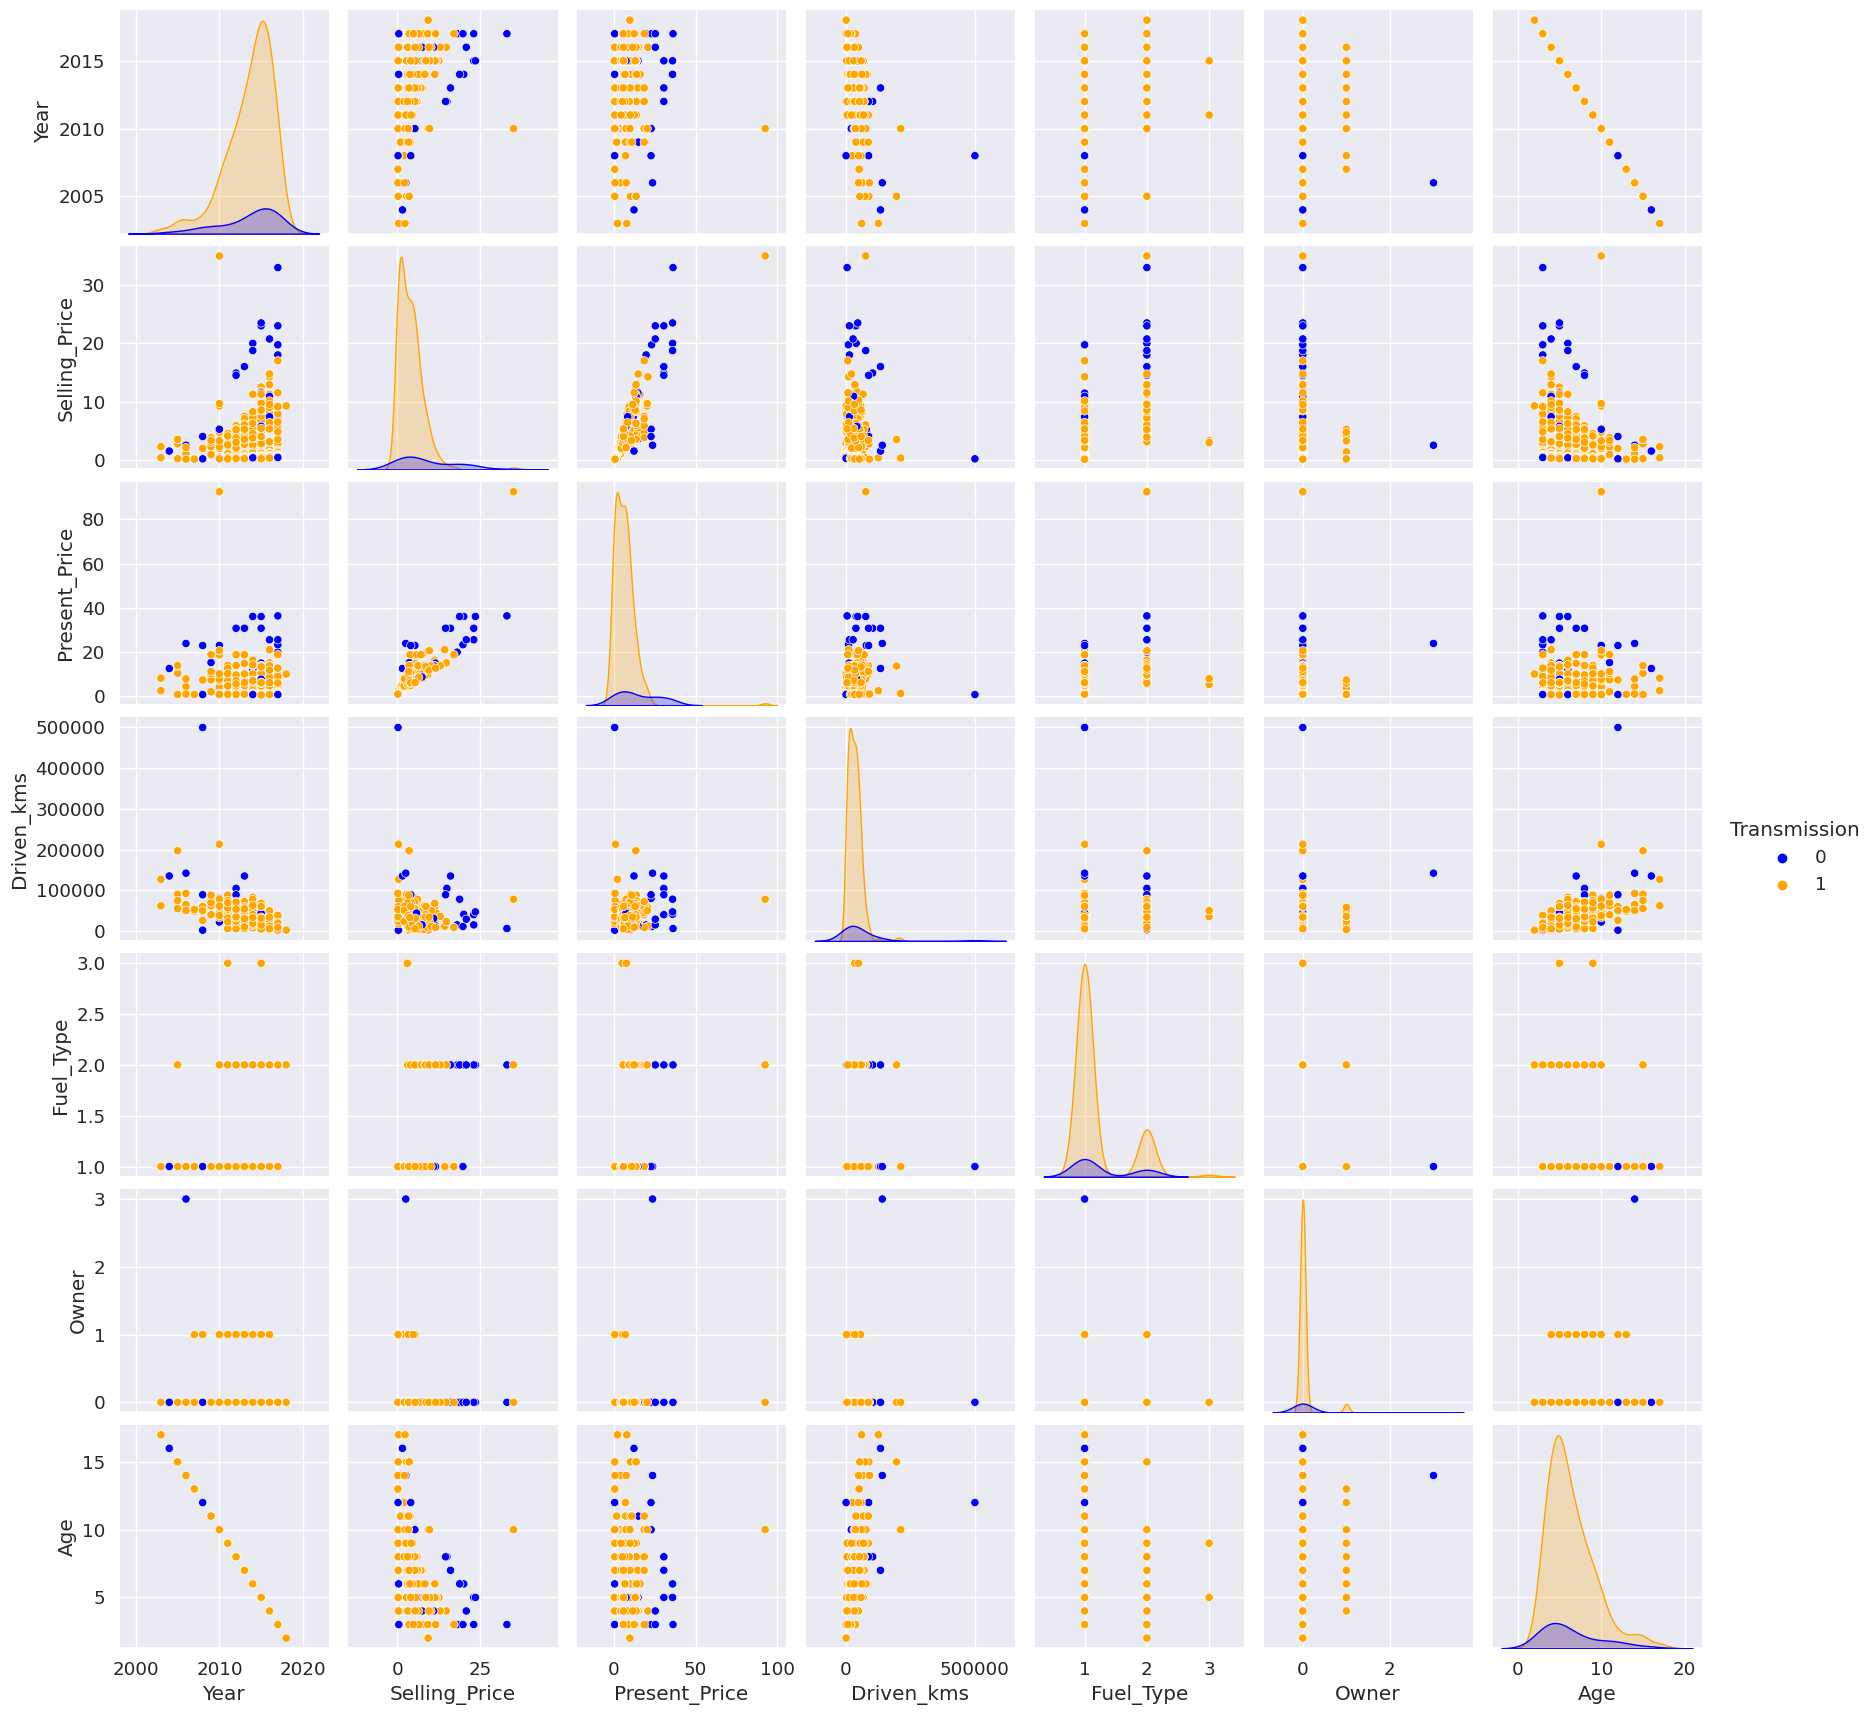

In [27]:
sns.pairplot(df1, hue='Transmission',palette=['blue', 'orange'])
plt.show()

In [28]:
def plot_bar(x,y,title):
    plt.figure(figsize=(18,4))
    sns.barplot(x=df1[x], y=df1[y], palette=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()

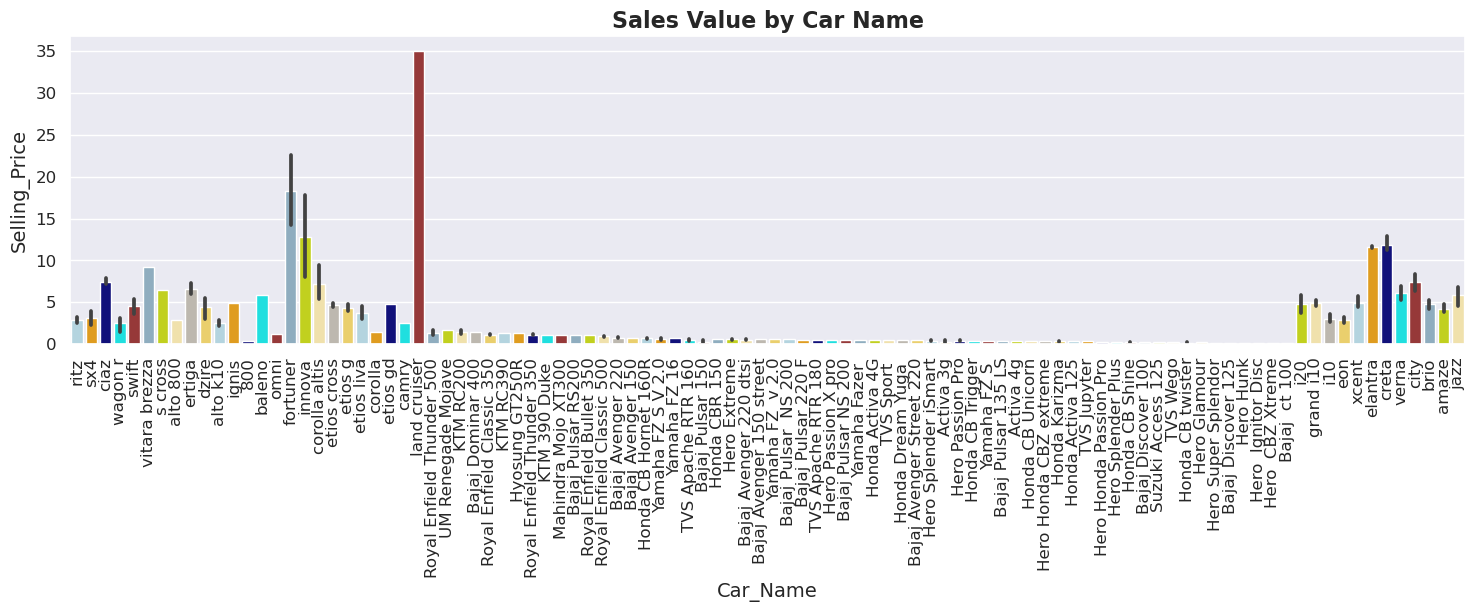

In [29]:
plot_bar('Car_Name','Selling_Price','Sales Value by Car Name')

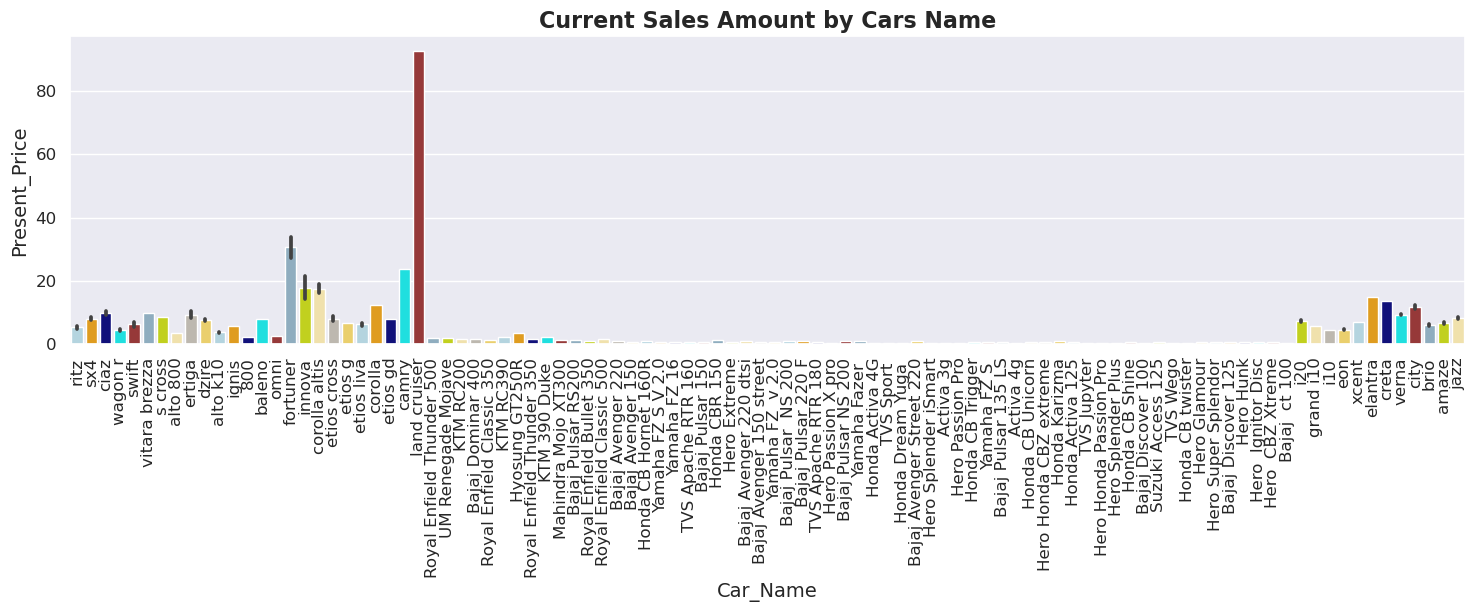

In [30]:
plot_bar('Car_Name','Present_Price','Current Sales Amount by Cars Name')

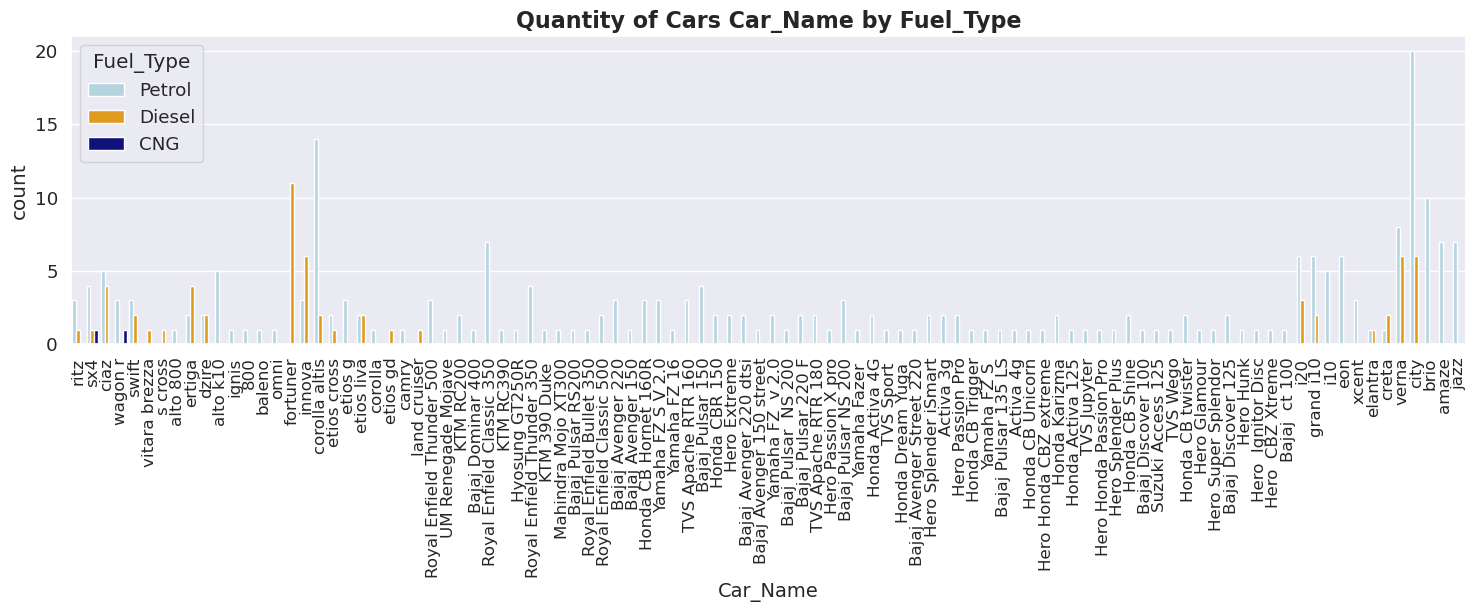

In [31]:
plot_count('Car_Name','Fuel_Type','Quantity of Cars')

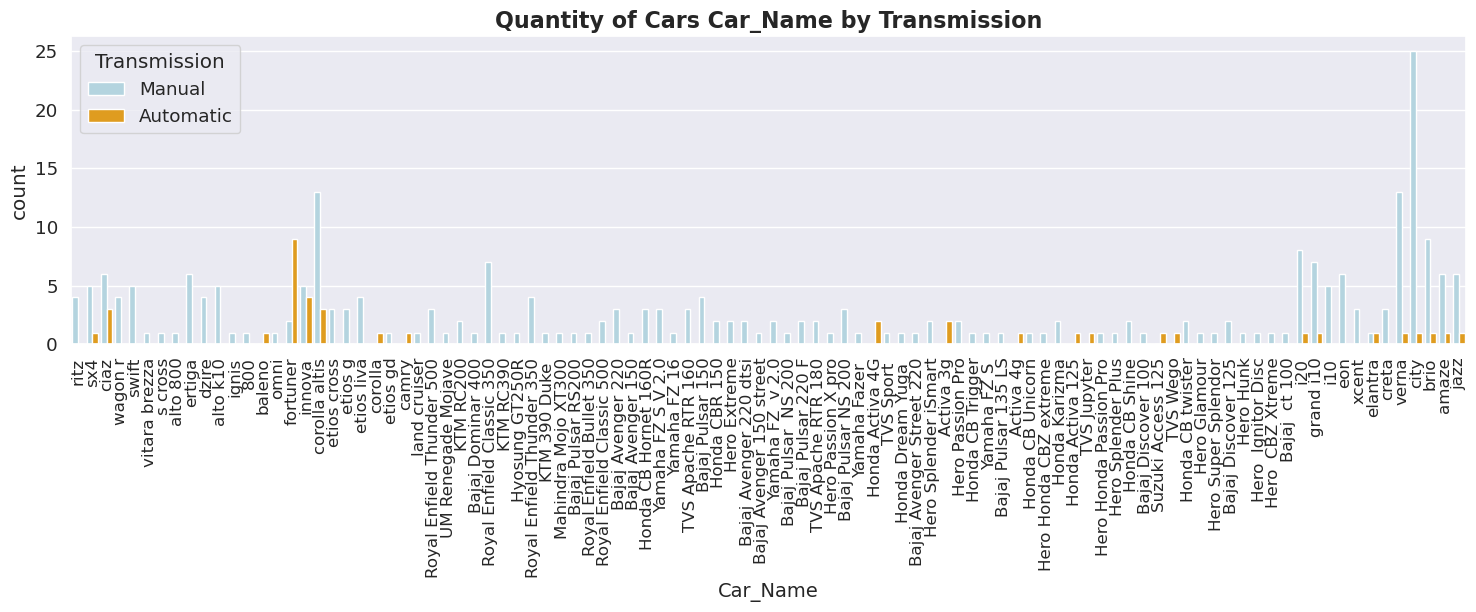

In [32]:
plot_count('Car_Name','Transmission','Quantity of Cars')

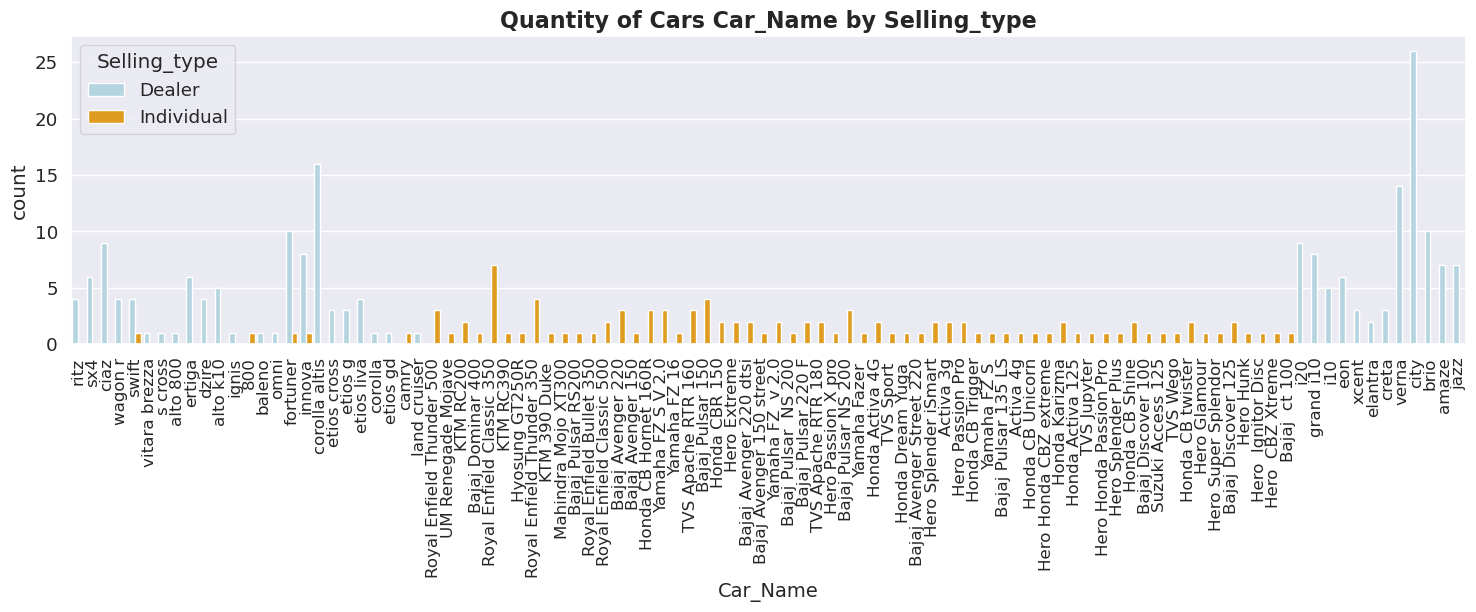

In [33]:
plot_count('Car_Name','Selling_type','Quantity of Cars')

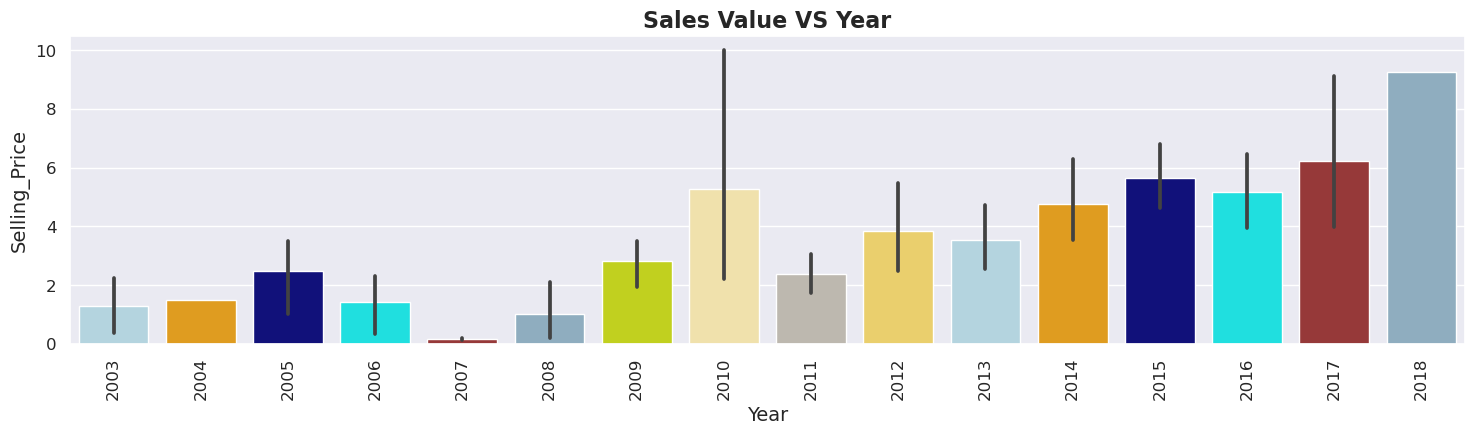

In [34]:
plot_bar('Year','Selling_Price','Sales Value VS Year')

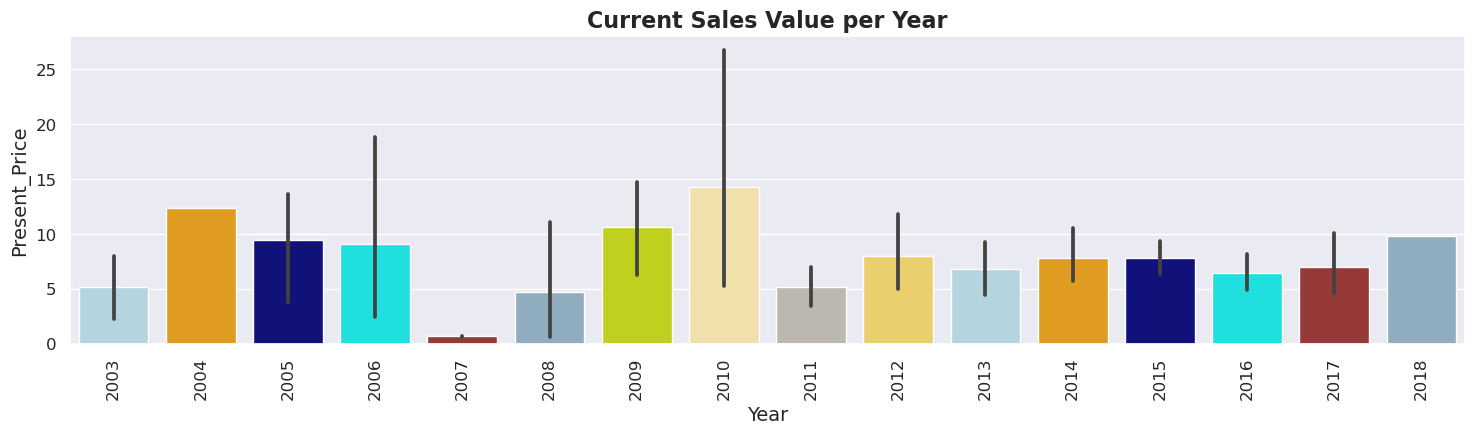

In [35]:
plot_bar('Year','Present_Price','Current Sales Value per Year')

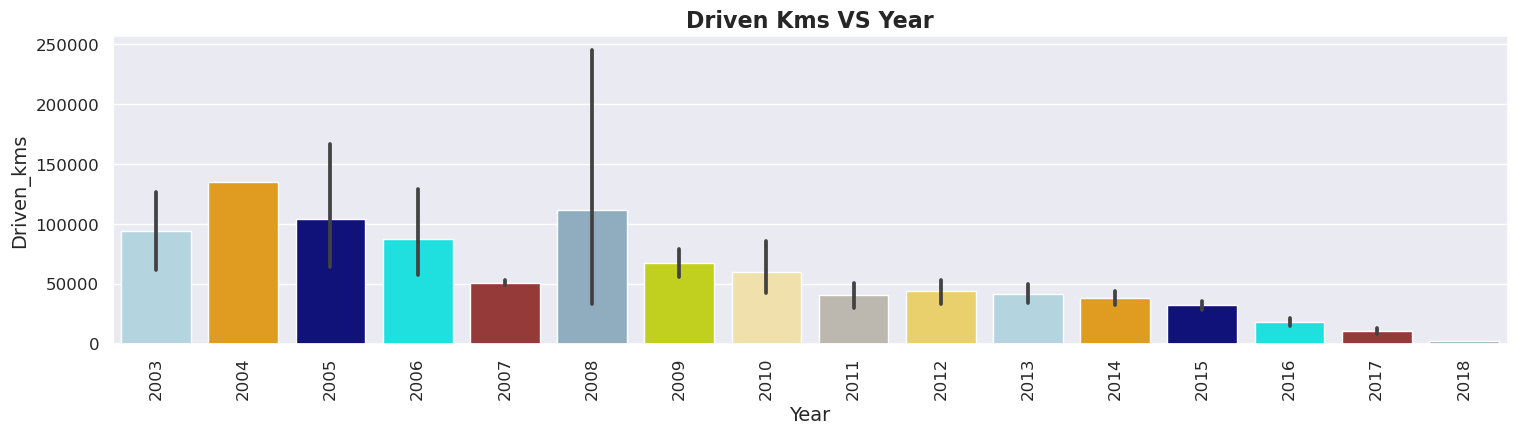

In [36]:
plot_bar('Year','Driven_kms','Driven Kms VS Year')

/tmp/ipykernel_20/63466062.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x], y=df[y], palette=color)


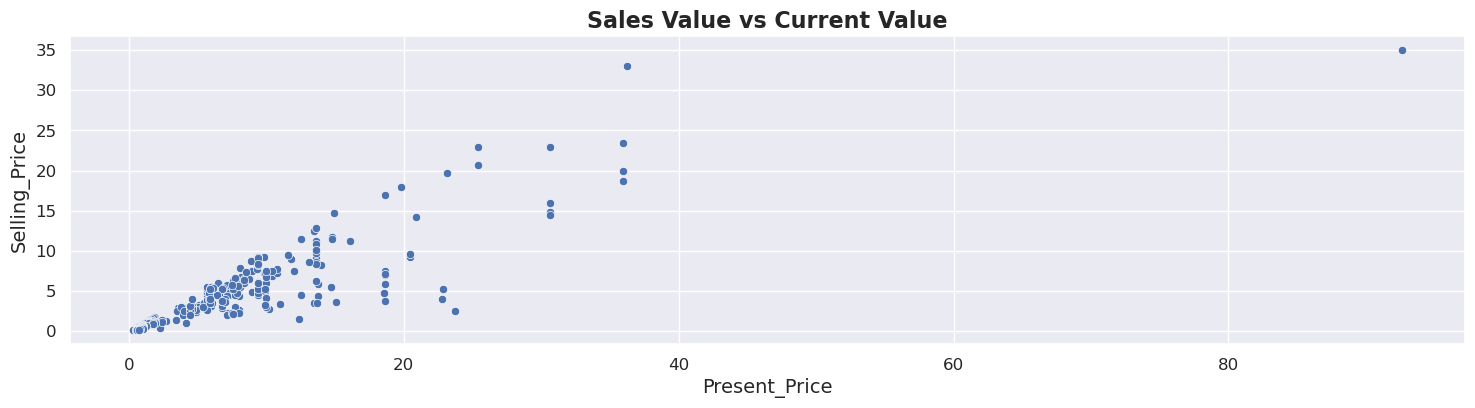

In [37]:
plot_scatter('Present_Price','Selling_Price','Sales Value vs Current Value' )

/tmp/ipykernel_20/63466062.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x], y=df[y], palette=color)


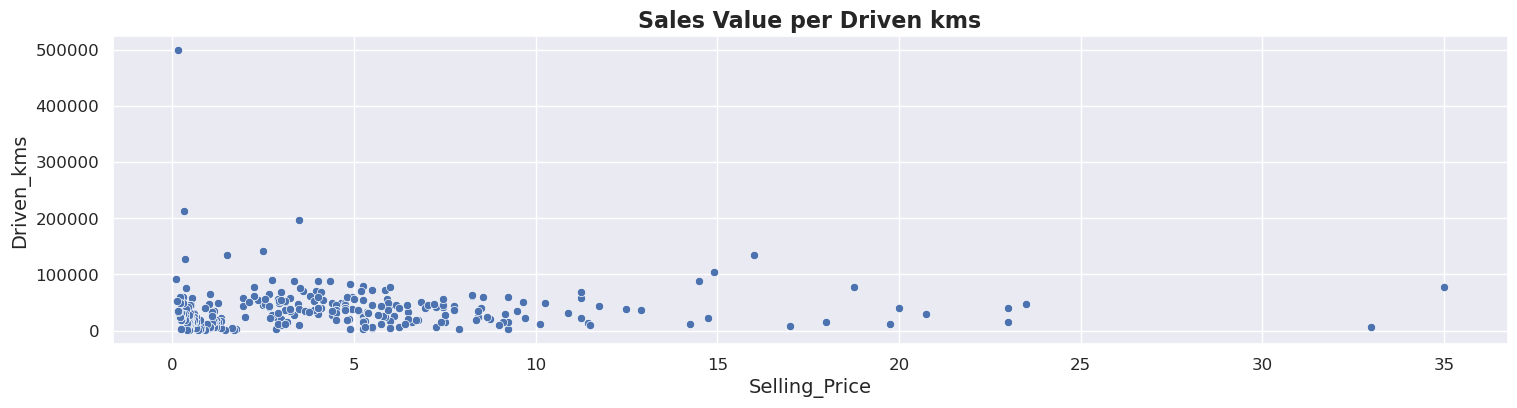

In [38]:
plot_scatter('Selling_Price','Driven_kms','Sales Value per Driven kms')

/tmp/ipykernel_20/63466062.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x], y=df[y], palette=color)


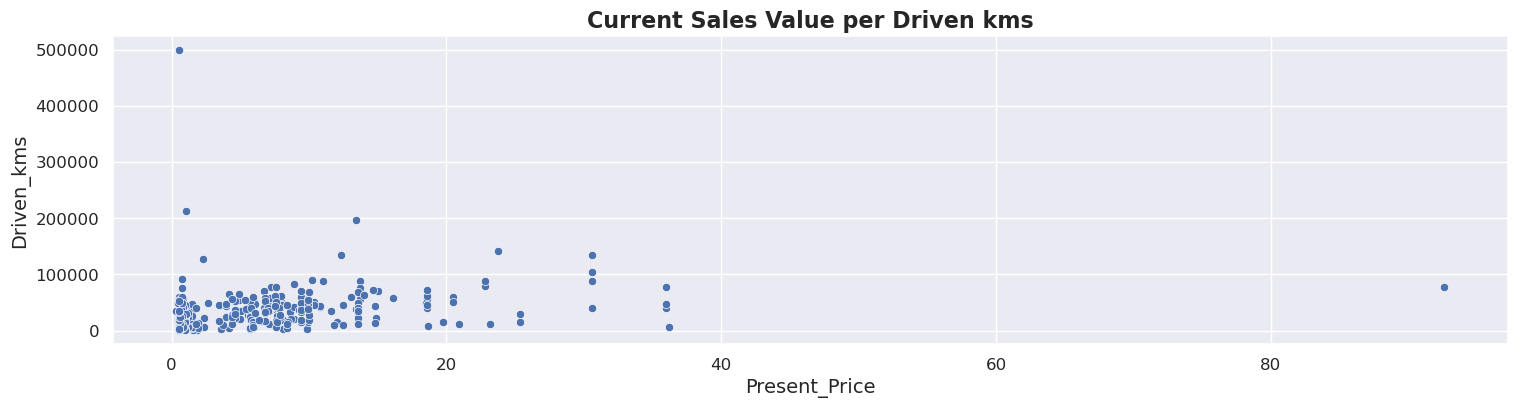

In [39]:
plot_scatter('Present_Price', 'Driven_kms','Current Sales Value per Driven kms')

In [40]:
num = df1.select_dtypes(exclude='object')
obj = df1.select_dtypes(include='object')
Fdf = pd.concat([num, obj], axis=1)

In [41]:
Cars = Fdf

In [42]:
Cars.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Age,Car_Name,Selling_type
0,2014,3.35,5.59,27000,1,1,0,6,ritz,Dealer
1,2013,4.75,9.54,43000,2,1,0,7,sx4,Dealer
2,2017,7.25,9.85,6900,1,1,0,3,ciaz,Dealer
3,2011,2.85,4.15,5200,1,1,0,9,wagon r,Dealer
4,2014,4.60,6.87,42450,2,1,0,6,swift,Dealer


In [43]:
Comp1 = np.corrcoef(Cars.Age, Cars.Selling_Price)
Comp1

array([[ 1.       , -0.2343694],
       [-0.2343694,  1.       ]])

In [44]:
Comp2 = np.corrcoef(Cars.Present_Price, Cars.Selling_Price)
Comp2

array([[1.        , 0.87630542],
       [0.87630542, 1.        ]])

In [45]:
Comp3 = np.corrcoef(Cars.Driven_kms, Cars.Selling_Price)
Comp3

array([[1.        , 0.02856559],
       [0.02856559, 1.        ]])

In [46]:
Comp4 = np.corrcoef(Cars.Owner, Cars.Selling_Price)
Comp4

array([[ 1.        , -0.08788045],
       [-0.08788045,  1.        ]])

In [47]:
Comp5 = np.corrcoef(Cars.Fuel_Type, Cars.Selling_Price)
Comp5

array([[1.        , 0.50029184],
       [0.50029184, 1.        ]])

In [48]:
Comp6 = np.corrcoef(Cars.Fuel_Type, Cars.Selling_Price)
Comp6

array([[1.        , 0.50029184],
       [0.50029184, 1.        ]])

In [49]:
#drop Volume 
Cars = Cars.drop("Car_Name",axis=1)
Cars

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Age,Selling_type
0,2014,3.35,5.59,27000,1,1,0,6,Dealer
1,2013,4.75,9.54,43000,2,1,0,7,Dealer
2,2017,7.25,9.85,6900,1,1,0,3,Dealer
3,2011,2.85,4.15,5200,1,1,0,9,Dealer
4,2014,4.60,6.87,42450,2,1,0,6,Dealer
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2,1,0,4,Dealer
297,2015,4.00,5.90,60000,1,1,0,5,Dealer
298,2009,3.35,11.00,87934,1,1,0,11,Dealer
299,2017,11.50,12.50,9000,2,1,0,3,Dealer


In [50]:
Cars=Cars.drop('Selling_type', axis=1)
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price'].values.reshape(-1,1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [52]:
print("X_train=",X_train.shape,"\nx_test=", X_test.shape)

X_train= (224, 7) 
x_test= (75, 7)


In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
result = model.score(X_test, y_test)
print('Score:', result)

Score: 0.8216215396837349


In [56]:
model_new = LinearRegression()

In [57]:
kfold_validation = KFold(7, shuffle=True, random_state=0)

In [58]:
results = cross_val_score (model_new, X, y, cv=kfold_validation)

In [59]:
print ('Result are   :  \n', results)
print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")
print ('\n Mean is : \n' ,np.mean(results))

Result are   :  
 [0.79399199 0.82931213 0.78560681 0.88664764 0.82498783 0.78009165
 0.82975887]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

 Mean is : 
 0.8186281307514013


In [60]:
Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform (Cars)
Norm1_Cars = pd.DataFrame (Norm1, columns=['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])

In [61]:
Norm1_Cars.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.707692,0.128643,0.078251,0.072906,0.103679,0.869565,0.014493,0.292308
std,0.193125,0.142815,0.092830,0.078108,0.211149,0.337346,0.082907,0.193125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.021490,0.009536,0.029029,0.000000,1.000000,0.000000,0.133333
50%,0.733333,0.097708,0.062635,0.063063,0.000000,1.000000,0.000000,0.266667
75%,0.866667,0.169054,0.103164,0.096864,0.000000,1.000000,0.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
Scaler_2 = preprocessing.StandardScaler()
Norm2 = Scaler_2.fit_transform (Cars)
Norm2_Cars = pd.DataFrame (Norm2, columns=[ 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])

In [63]:
Norm2_Cars.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,2.990000e+02
mean,3.023668e-14,-1.188199e-17,7.129191e-17,-4.158695e-17,-2.138757e-16,5.346893e-17,0.000000,-1.128789e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676,1.001676e+00
min,-3.670579e+00,-9.022758e-01,-8.443687e-01,-9.349646e-01,-4.918467e-01,-2.581989e+00,-0.175101,-1.516109e+00
25%,-5.585663e-01,-7.515492e-01,-7.414687e-01,-5.626912e-01,-4.918467e-01,3.872983e-01,-0.175101,-8.245502e-01
50%,1.329920e-01,-2.169723e-01,-1.685030e-01,-1.262328e-01,-4.918467e-01,3.872983e-01,-0.175101,-1.329920e-01
75%,8.245502e-01,2.834399e-01,2.688219e-01,3.072346e-01,-4.918467e-01,3.872983e-01,-0.175101,5.585663e-01
max,1.516109e+00,6.111534e+00,9.946096e+00,1.188921e+01,4.252094e+00,3.872983e-01,11.906871,3.670579e+00


In [64]:
y_pred = model.predict(X_test)

In [65]:
X_test.insert(7, "y_test", y_test)
X_test.insert(8, "y_pred", y_pred)

In [66]:
X_test.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Age,y_test,y_pred
208,2017,8.10,3435,1,1,0,3,7.9,5.995766
190,2008,0.75,60000,1,1,0,12,0.2,-1.243351
12,2015,9.94,15000,1,0,0,5,7.5,6.873338
221,2013,6.79,32000,1,0,0,7,4.5,4.514237
239,2012,4.43,23709,1,1,0,8,2.0,2.286536


In [67]:
print ("Initial model:")
print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

Initial model:
Intercept: [-358.96027573]
Coefficients: [[ 1.78964125e-01  4.63052105e-01 -1.08606065e-05  1.67589368e+00
  -8.67014861e-01 -1.18505748e+00 -1.78964125e-01]]


In [68]:
print ("Initial model metrics:")
print ("Initial model MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("Initial model MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("Initial model RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Initial model metrics:
Initial model MAE: 1.3198646393290125
Initial model MSE: 4.652686561276889
Initial model RMSE: 2.1570087068152715


In [69]:
print ("Normalized model R2 Score:", metrics.r2_score (y_test, y_pred))

Normalized model R2 Score: 0.8216215396837349


In [70]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [72]:
Age2 = Cars.Age**2
Present_Price7 = Cars.Present_Price**7
Kms_Driven2 = Cars.Driven_kms**2
Owner2 = Cars.Owner**2

In [73]:
# Adding higher exponent of Features to the initial dataset
Cars.insert(1, 'Age2', Age2)
Cars.insert(4, 'Present_Price7', Present_Price7)
Cars.insert(6, 'Kms_Driven2', Kms_Driven2)
Cars.insert(8, 'Owner2', Owner2)

In [74]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)


In [76]:
regressor = LinearRegression()

In [77]:
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
print('Intercept:\n\n',regressor.intercept_)

print("___________________________\n")
print('Coefficients:\n\n',regressor.coef_)

Intercept:

 -711.3497862393863
___________________________

Coefficients:

 [ 3.53399162e-01  2.52626818e-02  5.86182158e-01 -3.15421300e-13
 -2.52901483e-05  4.77617150e-11  1.29446061e+00 -1.34262301e+00
  2.48760809e-01  1.47856163e+00 -3.53399162e-01]


In [79]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Year,3.533992e-01
Age2,2.526268e-02
Present_Price,5.861822e-01
Present_Price7,-3.154213e-13
Driven_kms,-2.529015e-05
Kms_Driven2,4.776172e-11
Fuel_Type,1.294461e+00
Owner2,-1.342623e+00
Transmission,2.487608e-01
Owner,1.478562e+00


In [80]:
y_pred = regressor.predict(X_test)

In [81]:
print ("Improved model metrics:")
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Improved model metrics:
MAE: 1.178425825576382
MSE: 3.4795830940031633
RMSE: 1.865364064734593


In [82]:
print ("Improved model R2 Score:", regressor.score (X_train, y_train)) 

Improved model R2 Score: 0.9162758822900171


In [83]:
print ("Improved model R2 Score:", metrics.r2_score (y_test, y_pred)) 

Improved model R2 Score: 0.866596929177097


In [84]:
print('Improved accuracy =', ((0.8619745435370272 / 0.8999104274066024) - 1) * 100,'%')

Improved accuracy = -4.215517757572873 %


In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)


print("Mean Absolute Error :", metrics.mean_absolute_error(y_test,y_pred_rf))
print("Mean Squared Error :", metrics.mean_squared_error(y_test,y_pred_rf))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_absolute_error(y_test,y_pred_rf)))
print("R2 Score :", metrics.r2_score(y_test,y_pred_rf))

Mean Absolute Error : 0.641989333333333
Mean Squared Error : 2.485317772533334
Root Mean Squared Error : 0.801242368658406
R2 Score : 0.9047158771985967


In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)


print("Mean Absolute Error :", metrics.mean_absolute_error(y_test,y_pred_gbt))
print("Mean Squared Error :", metrics.mean_squared_error(y_test,y_pred_gbt))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_absolute_error(y_test,y_pred_gbt)))
print("R2 Score :", metrics.r2_score(y_test,y_pred_gbt))

Mean Absolute Error : 0.5810213808771388
Mean Squared Error : 1.7163053727369277
Root Mean Squared Error : 0.7622475850254554
R2 Score : 0.9341988965323024
